In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
# South Korea
korean = pd.read_csv("Apart Deal.csv")
korean

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_32891/2054269271.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  korean = pd.read_csv("Apart Deal.csv")


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [3]:
k_neighborhoods = korean.iloc[:, 1]#.value_counts()
k_neighborhoods = pd.DataFrame([i.split(" ")[0] for i in k_neighborhoods], columns = {"Neighbourhoods":0})
#k_neighborhoods["Neighbourhoods"].value_counts()
k_neighborhoods["Neighbourhoods"].value_counts()#[0:20]

Neighbourhoods
중동       52072
정자동      25149
상동       24889
신정동      24504
상계동      24230
         ...  
화영동          1
오산면          1
다가동3가        1
대합면          1
하성면          1
Name: count, Length: 2352, dtype: int64

<Axes: >

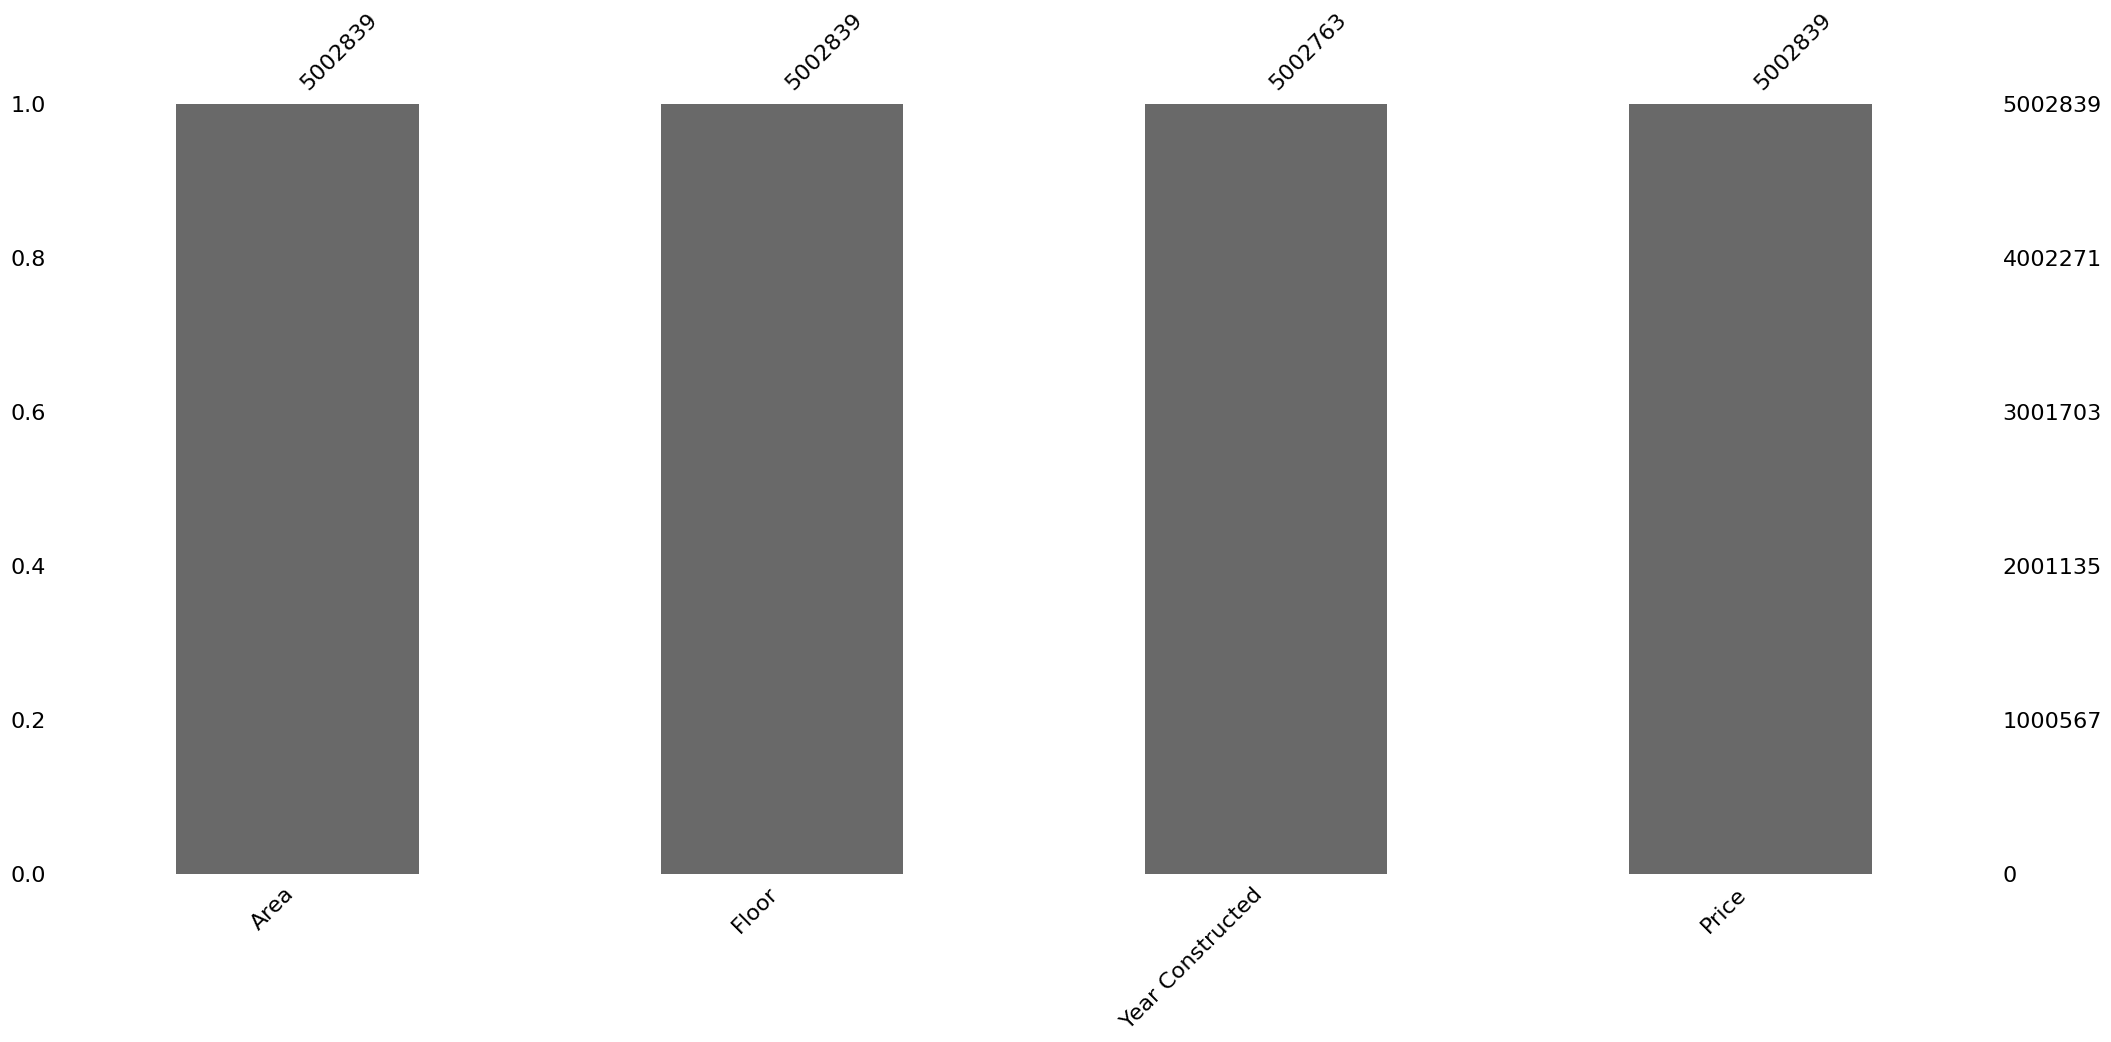

In [4]:
korean = korean.iloc[:, 5:9]
korean.columns = ["Area", "Floor", "Year Constructed", "Price"]
#korean["Room Count"] = 1
msno.bar(korean)
# ~100 missing from year constructed

In [5]:
korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Area              float64
 1   Floor             object 
 2   Year Constructed  float64
 3   Price             object 
dtypes: float64(2), object(2)
memory usage: 152.7+ MB


In [6]:
korean["Price"] = korean["Price"].replace(regex = {',': ''}).astype(int)

korean["Price"].sort_values()

# $870 - $12.6 mil...?

## 3 kinds of rental contracts exist
## Transation amount from data does not specify which contract - cannot accurately gauge how payment calculated 
## (monthly rent, full apartment price, mix of both?)

## revisit or remove**

2938997        100
4037666        350
4037665        350
4037667        350
4037668        350
            ...   
4686612    1300000
4686111    1350000
4349327    1350000
4364227    1450000
4701011    1450000
Name: Price, Length: 5002839, dtype: int64

In [7]:
#korean = korean.dropna()
#korean["Price"] = korean["Price"].replace(regex = {',': ''}).astype(int)
#korean["Price"] = np.floor(korean["Price"] * 10000 * .00087).astype(int)
#measured in 10,000 krw originally
#korean["Year Constructed"] = korean["Year Constructed"].astype(int)
#korean["Country"] = "South Korea"
#korean

In [8]:
#korean.loc[korean["Area"] == min(korean.Area)]
#korean.sort_values(by = "Price")

In [9]:
# floor as int
#korean["Floor"].value_counts()

In [10]:
# Germany
germany = pd.read_csv("immo_data.csv")
#germany = germany[["regio1", "balcony", "totalRent", "yearConstructed", "baseRent", "livingSpace", "geo_krs", 
                   #"condition", "typeOfFlat", "noRooms", "floor", "numberOfFloors", "lastRefurbish", "date"]]
german_regions = germany[["regio1"]]
germany = germany[["livingSpace", "floor", "yearConstructed", "baseRent", "noRooms"]]
germany.columns = ["Area", "Floor", "Year Constructed", "Price", "Rooms"]
germany

,Area,Floor,Year Constructed,Price,Rooms
0,86.00,1.0,1965.0,595.0,4.0
1,89.00,NaN,1871.0,800.0,3.0
2,83.80,3.0,2019.0,965.0,3.0
3,58.15,3.0,1964.0,343.0,3.0
4,84.97,1.0,1950.0,765.0,3.0
...,...,...,...,...,...
268845,90.00,NaN,2016.0,820.0,3.0
268846,115.00,1.0,1983.0,930.0,3.5
268847,95.00,1.0,1965.0,650.0,4.0
268848,70.00,NaN,2019.0,840.0,2.0


<Axes: >

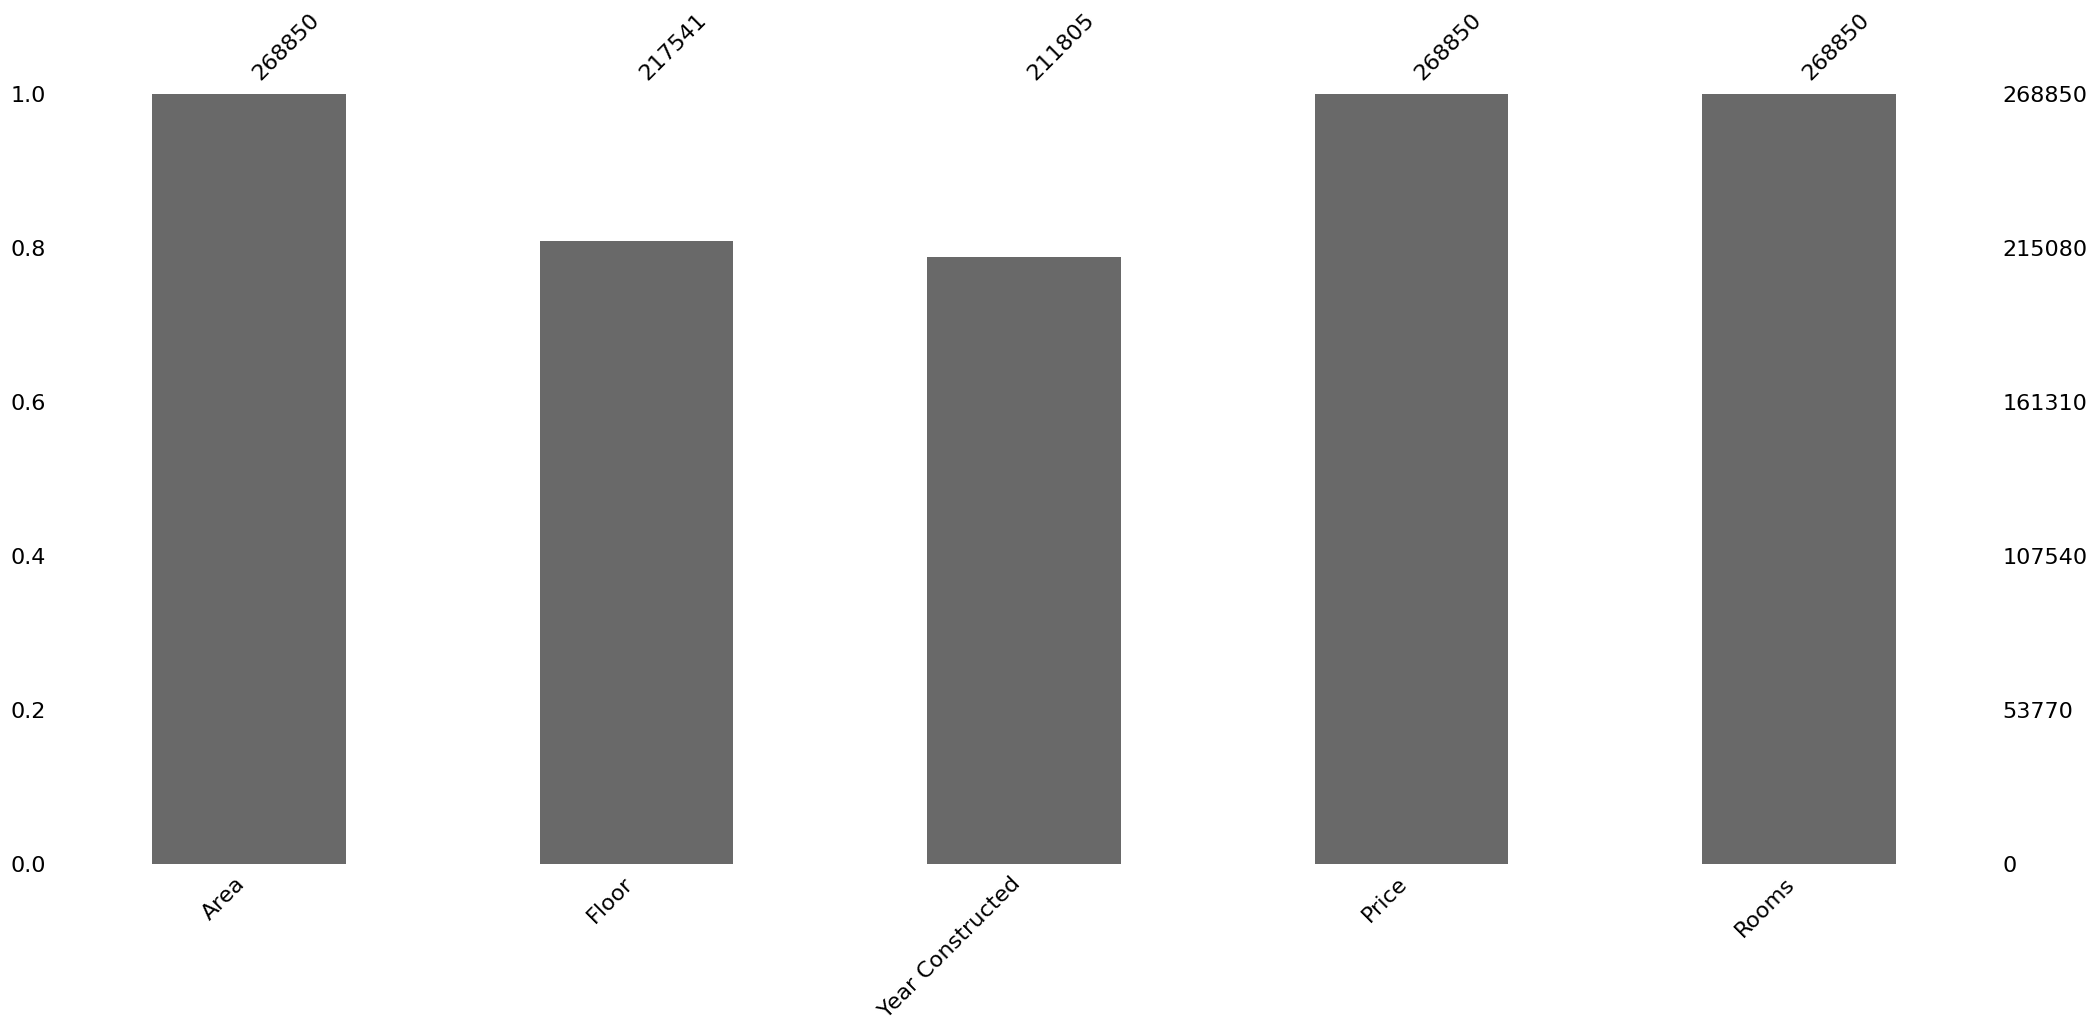

In [11]:
msno.bar(germany)

In [12]:
euro = 1.15
germany["Price"] = np.floor(germany["Price"] * euro).astype(int)
# price determined by conversion rate of euro to usd at time postings/transactions occurred

germany = germany.loc[germany["Floor"] <= 20]
germany
# most buildings 4-6 floors, and ~30 apartment units
# https://commercial-germany.com/apartment-buildings/

,Area,Floor,Year Constructed,Price,Rooms
0,86.00,1.0,1965.0,684,4.0
2,83.80,3.0,2019.0,1109,3.0
3,58.15,3.0,1964.0,394,3.0
4,84.97,1.0,1950.0,879,3.0
6,62.00,1.0,NaN,356,2.0
...,...,...,...,...,...
268842,59.89,3.0,NaN,345,2.0
268843,55.00,1.0,1930.0,285,2.0
268844,85.00,3.0,NaN,678,3.0
268846,115.00,1.0,1983.0,1069,3.5


In [13]:
germany.dropna(inplace = True)
germany = germany.astype(int)
germany["Country"] = "Germany"
germany

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_32891/532531839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany.dropna(inplace = True)


,Area,Floor,Year Constructed,Price,Rooms,Country
0,86,1,1965,684,4,Germany
2,83,3,2019,1109,3,Germany
3,58,3,1964,394,3,Germany
4,84,1,1950,879,3,Germany
8,53,2,1970,667,2,Germany
...,...,...,...,...,...,...
268840,89,2,2016,1443,3,Germany
268841,57,2,1994,347,2,Germany
268843,55,1,1930,285,2,Germany
268846,115,1,1983,1069,3,Germany


In [14]:
# Poland
poland = pd.read_csv("apartments_rent_pl_2023_11.csv")
#poland["buildingMaterial"].value_counts(dropna=False)
#poland = poland[["squareMeters", "rooms", "floor", "floorCount", "buildYear", "poiCount", "condition", "price"]]
poland = poland.loc[poland["type"] == "apartmentBuilding"]#.reset_index(drop = True)
polish_region = poland[["city"]]
#poland["ownership"].value_counts()
poland

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
3,50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,32.6,2.0,5.0,6.0,2021.0,53.421582,14.541572,...,0.192,condominium,brick,premium,no,yes,yes,no,no,2500
4,9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,72.0,3.0,6.0,6.0,2014.0,53.450010,14.547230,...,0.315,condominium,brick,premium,no,yes,yes,no,yes,2999
13,9d367adf87498634275de9607815173f,szczecin,apartmentBuilding,40.0,2.0,5.0,7.0,2021.0,53.404167,14.503333,...,0.210,condominium,brick,premium,yes,no,yes,no,no,3000
14,34a1ea9e2c896d5cac97fe431a3fedd1,szczecin,apartmentBuilding,26.0,1.0,6.0,7.0,2021.0,53.404167,14.503333,...,0.210,condominium,brick,premium,yes,yes,yes,no,no,2000
16,755bcd527418bdc97e6fb6b4e68a81bb,szczecin,apartmentBuilding,60.0,3.0,4.0,4.0,2021.0,53.393732,14.492816,...,0.522,condominium,brick,premium,no,no,yes,no,no,3250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,81baae9c33d036e82de1bcda7caae237,bydgoszcz,apartmentBuilding,44.0,2.0,3.0,3.0,2021.0,53.126000,18.007900,...,0.205,condominium,brick,NaN,no,yes,yes,no,no,2350
8505,4cfb33bdb78b6b19f394354ea2a9abc1,bydgoszcz,apartmentBuilding,34.0,2.0,2.0,16.0,2023.0,53.122484,18.041888,...,0.511,condominium,brick,premium,yes,yes,yes,no,no,2300
8507,f9ab4a98d3fc90bf62d85194be542367,bydgoszcz,apartmentBuilding,80.0,4.0,3.0,3.0,NaN,53.138334,18.021229,...,0.404,condominium,brick,NaN,no,yes,yes,no,no,4500
8517,a69e8a0ec5c756789ea5ff696e345655,bydgoszcz,apartmentBuilding,55.0,2.0,3.0,3.0,NaN,53.129551,18.029431,...,0.024,condominium,brick,NaN,no,no,no,no,no,3000


In [15]:
poland = poland[["squareMeters", "floor", "buildYear", "price", "rooms"]]
poland.columns = ["Area", "Floor", "Year Constructed", "Price", "Rooms"]
poland["Price"] = poland["Price"].astype(int) * 0.25
poland

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_32891/1026051911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poland["Price"] = poland["Price"].astype(int) * 0.25


,Area,Floor,Year Constructed,Price,Rooms
3,32.6,5.0,2021.0,625.00,2.0
4,72.0,6.0,2014.0,749.75,3.0
13,40.0,5.0,2021.0,750.00,2.0
14,26.0,6.0,2021.0,500.00,1.0
16,60.0,4.0,2021.0,812.50,3.0
...,...,...,...,...,...
8501,44.0,3.0,2021.0,587.50,2.0
8505,34.0,2.0,2023.0,575.00,2.0
8507,80.0,3.0,NaN,1125.00,4.0
8517,55.0,3.0,NaN,750.00,2.0


<Axes: >

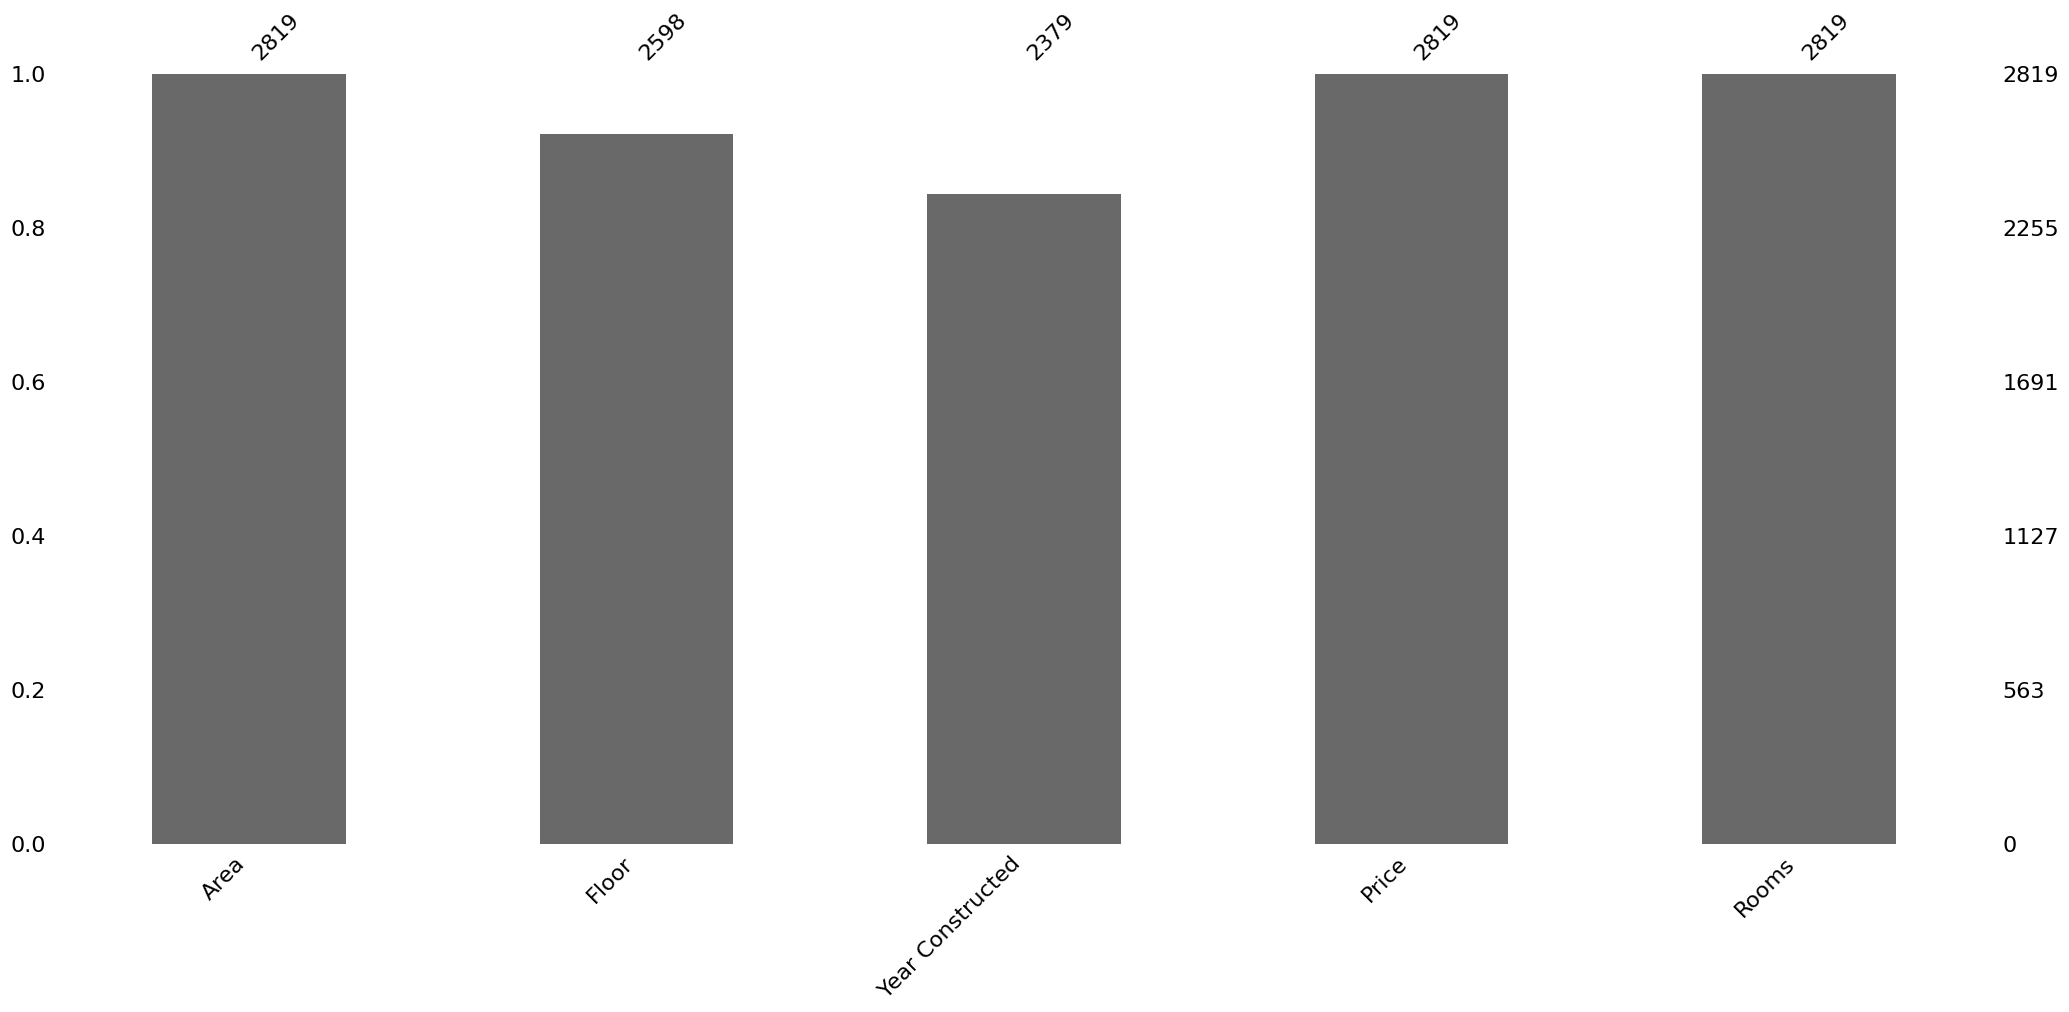

In [16]:
msno.bar(poland)

In [17]:
poland = poland.dropna().astype(int)
poland["Country"] = "Poland"
poland

,Area,Floor,Year Constructed,Price,Rooms,Country
3,32,5,2021,625,2,Poland
4,72,6,2014,749,3,Poland
13,40,5,2021,750,2,Poland
14,26,6,2021,500,1,Poland
16,60,4,2021,812,3,Poland
...,...,...,...,...,...,...
8484,47,5,2021,825,3,Poland
8489,56,8,2017,675,3,Poland
8496,45,2,2020,575,2,Poland
8501,44,3,2021,587,2,Poland


In [18]:
# Spain
spain = pd.read_csv("pisos.csv", index_col = 0)
spain

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_32891/2716223445.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  spain = pd.read_csv("pisos.csv", index_col = 0)


,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
0,Casa en calle Urb. Las Mimosas,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/104/1069_I00...,Recomendado,250.000 €,315 m²,4,793 €/m²,3,31,pisos,a_coruna
1,Piso en Milladoiro,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/113/1069_I00...,Recomendado,90.000 €,72 m²,2,1.250 €/m²,1,11,pisos,a_coruna
2,Casa en calle La Piedra,NaN,A Ortigueira (Cariño),https://fotos1.imghs.net/nrd//999170/892070610...,Recomendado,50.000 €,92 m²,2,543 €/m²,1,40,pisos,a_coruna
3,Casa en Perillo,NaN,Perillo (Oleiros),https://fotos3.imghs.net/nrd/1089/198/1089_XA2...,Recomendado,359.000 €,244 m²,4,1.471 €/m²,3,39,pisos,a_coruna
4,Chalet en Urbanización Las Mimosas,NaN,O Milladoiro (Ames),https://fotos5.imghs.net/nrd/1097/754/1097_0_f...,Recomendado,200.430 €,315 m²,4,636 €/m²,3,24,pisos,a_coruna
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831430,Finca rústica en Cardedeu,Suelo urbano no consolidado de uso residencial...,Cardedeu,https://fotos4.imghs.net/nrd/1088/335/1088_727...,NaN,A consultar,4.381 m²,NaN,NaN,NaN,10,fincas_rusticas,valles_oriental_sud
831431,Finca rústica en Granollers,Solar urbano consolidado sin edificación de us...,Can Bassa-Palou (Granollers),https://fotos2.imghs.net/nrd/1088/137/1088_727...,NaN,A consultar,4.063 m²,NaN,NaN,NaN,4,fincas_rusticas,valles_oriental_sud
831432,Finca rústica en La Roca del Vallès,+finca situada al norte del municipio de la ro...,La Roca del Vallès,https://fotos3.imghs.net/nrd//1005/057/1005_60...,NaN,1.350.000 €,350 m²,5,3.857 €/m²,2.0,9,fincas_rusticas,valles_oriental_sud
831433,"Finca rústica en Bajada Les Valls, nº S/N","""Masía típica catalana, casa principal de 165 ...",La Roca del Vallès,https://fotos5.imghs.net/nrd/1098/460/1098_0_f...,NaN,456.000 €,202 m²,5,2.257 €/m²,3.0,30,fincas_rusticas,valles_oriental_sud


In [19]:
spain = spain.loc[spain["type"].isin(["pisos", "piso"])]
spain.columns

Index(['summary', 'description', 'location', 'photo', 'recomendado', 'price',
       'size', 'rooms', 'price/m2', 'bathrooms', 'Num Photos', 'type',
       'region'],
      dtype='object')

In [20]:
spanish_regions = spain[["region"]]
spain = spain[["size", "price", "rooms"]]
spain.columns = ["Area", "Price", "Rooms"]
spain

,Area,Price,Rooms
0,315 m²,250.000 €,4
1,72 m²,90.000 €,2
2,92 m²,50.000 €,2
3,244 m²,359.000 €,4
4,315 m²,200.430 €,4
...,...,...,...
831319,2,129.000 €,2
831320,73 m²,160.000 €,1
831321,3,190.000 €,3
831322,80 m²,172.000 €,2


<Axes: >

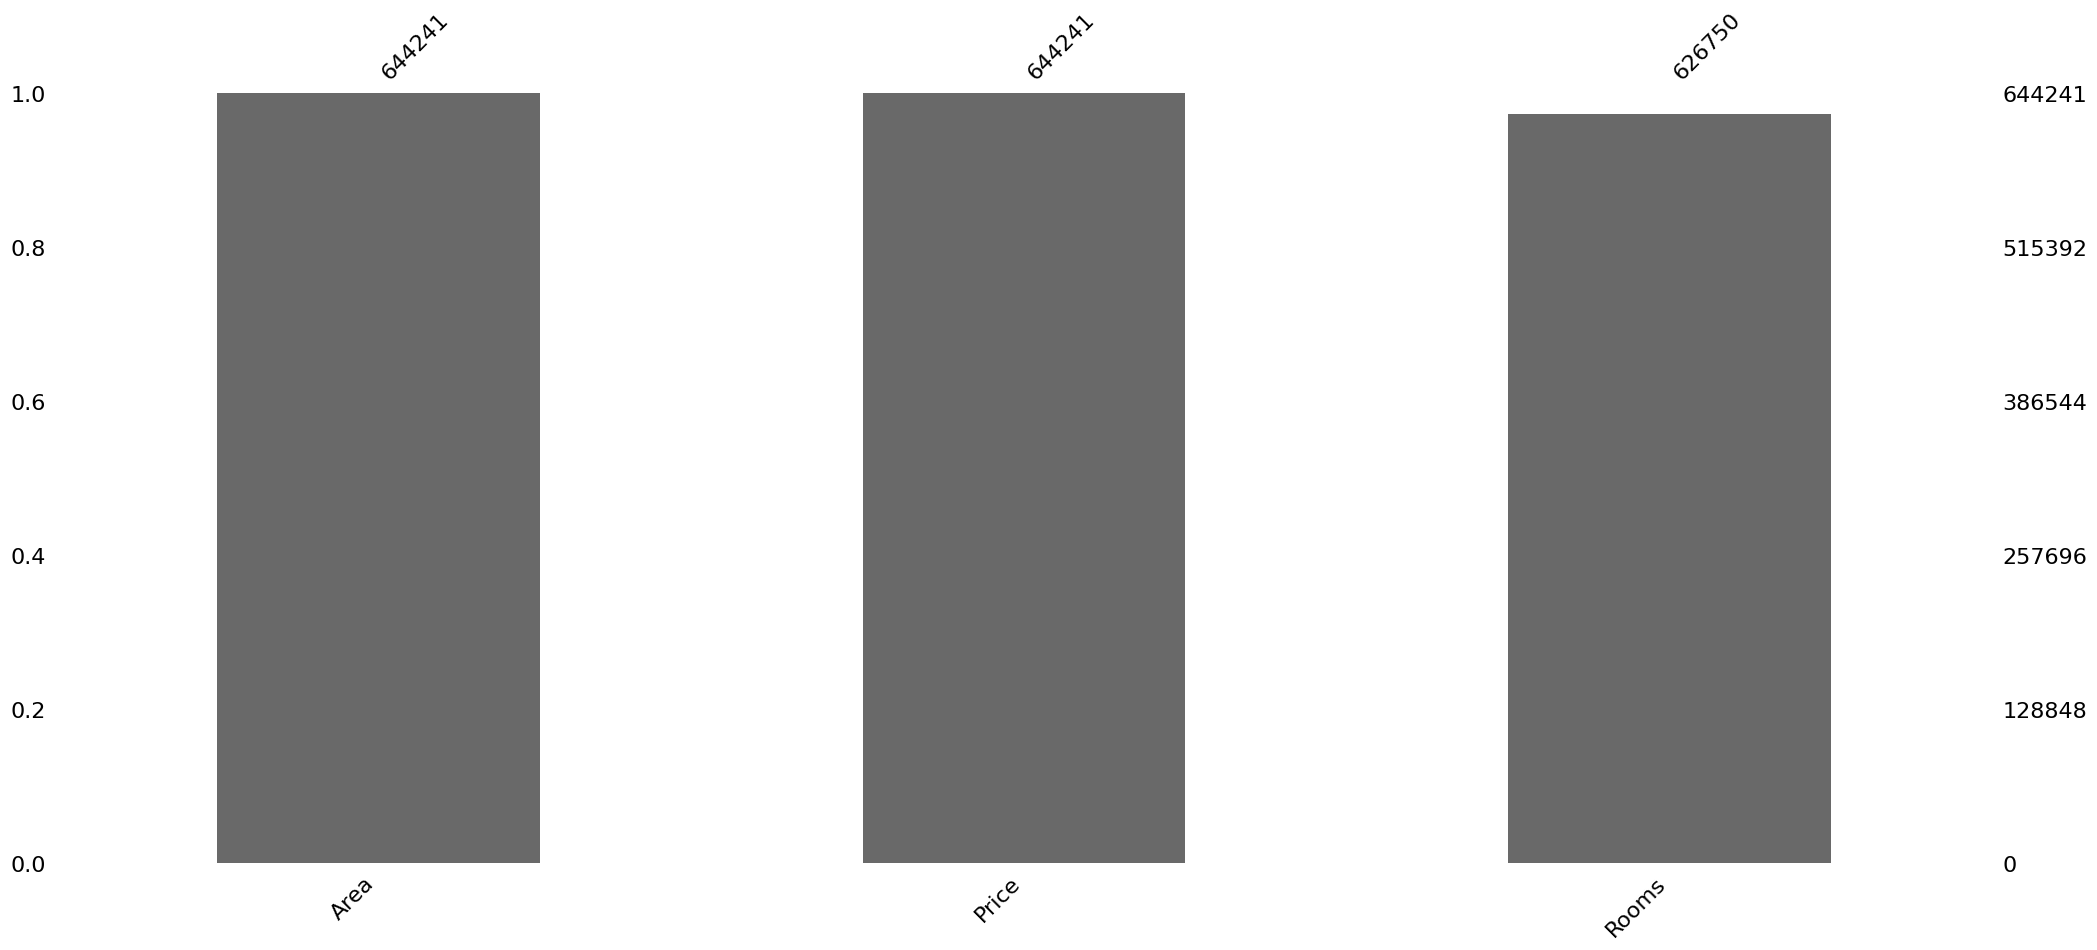

In [21]:
msno.bar(spain)

In [22]:
#spain.loc[spain["Price"].isna()].index

In [23]:
spain["Price"] = spain["Price"].str.extract(r'(\d+)', expand = False)
spain.dropna(inplace = True)
spain["Price"] = spain["Price"].astype(int) * euro
spain["Area"] = spain["Area"].str.extract(r'(\d+)', expand = False)
spain = spain.astype(int)
spain["Country"] = "Spain"
spain

,Area,Price,Rooms,Country
0,315,287,4,Spain
1,72,103,2,Spain
2,92,57,2,Spain
3,244,412,4,Spain
4,315,229,4,Spain
...,...,...,...,...
831319,2,148,2,Spain
831320,73,184,1,Spain
831321,3,218,3,Spain
831322,80,197,2,Spain


In [24]:
## maybe

In [25]:
# Argentina
argentina = pd.read_csv("ar_properties.csv")
argentina = argentina[["property_type", "operation_type", "price_period", "surface_covered", "rooms", "price", "currency"]]
argentina

,property_type,operation_type,price_period,surface_covered,rooms,price,currency
0,Lote,Venta,Mensual,NaN,NaN,NaN,NaN
1,Departamento,Venta,Mensual,41.0,NaN,NaN,NaN
2,Departamento,Alquiler temporal,Mensual,45.0,2.0,NaN,NaN
3,Departamento,Alquiler temporal,Mensual,48.0,2.0,NaN,NaN
4,Departamento,Alquiler temporal,Mensual,45.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...
999995,Otro,Venta,NaN,NaN,NaN,750000.0,USD
999996,Otro,Venta,NaN,NaN,NaN,180000.0,USD
999997,Otro,Venta,NaN,NaN,NaN,450000.0,USD
999998,Otro,Venta,NaN,NaN,NaN,500000.0,USD


<Axes: >

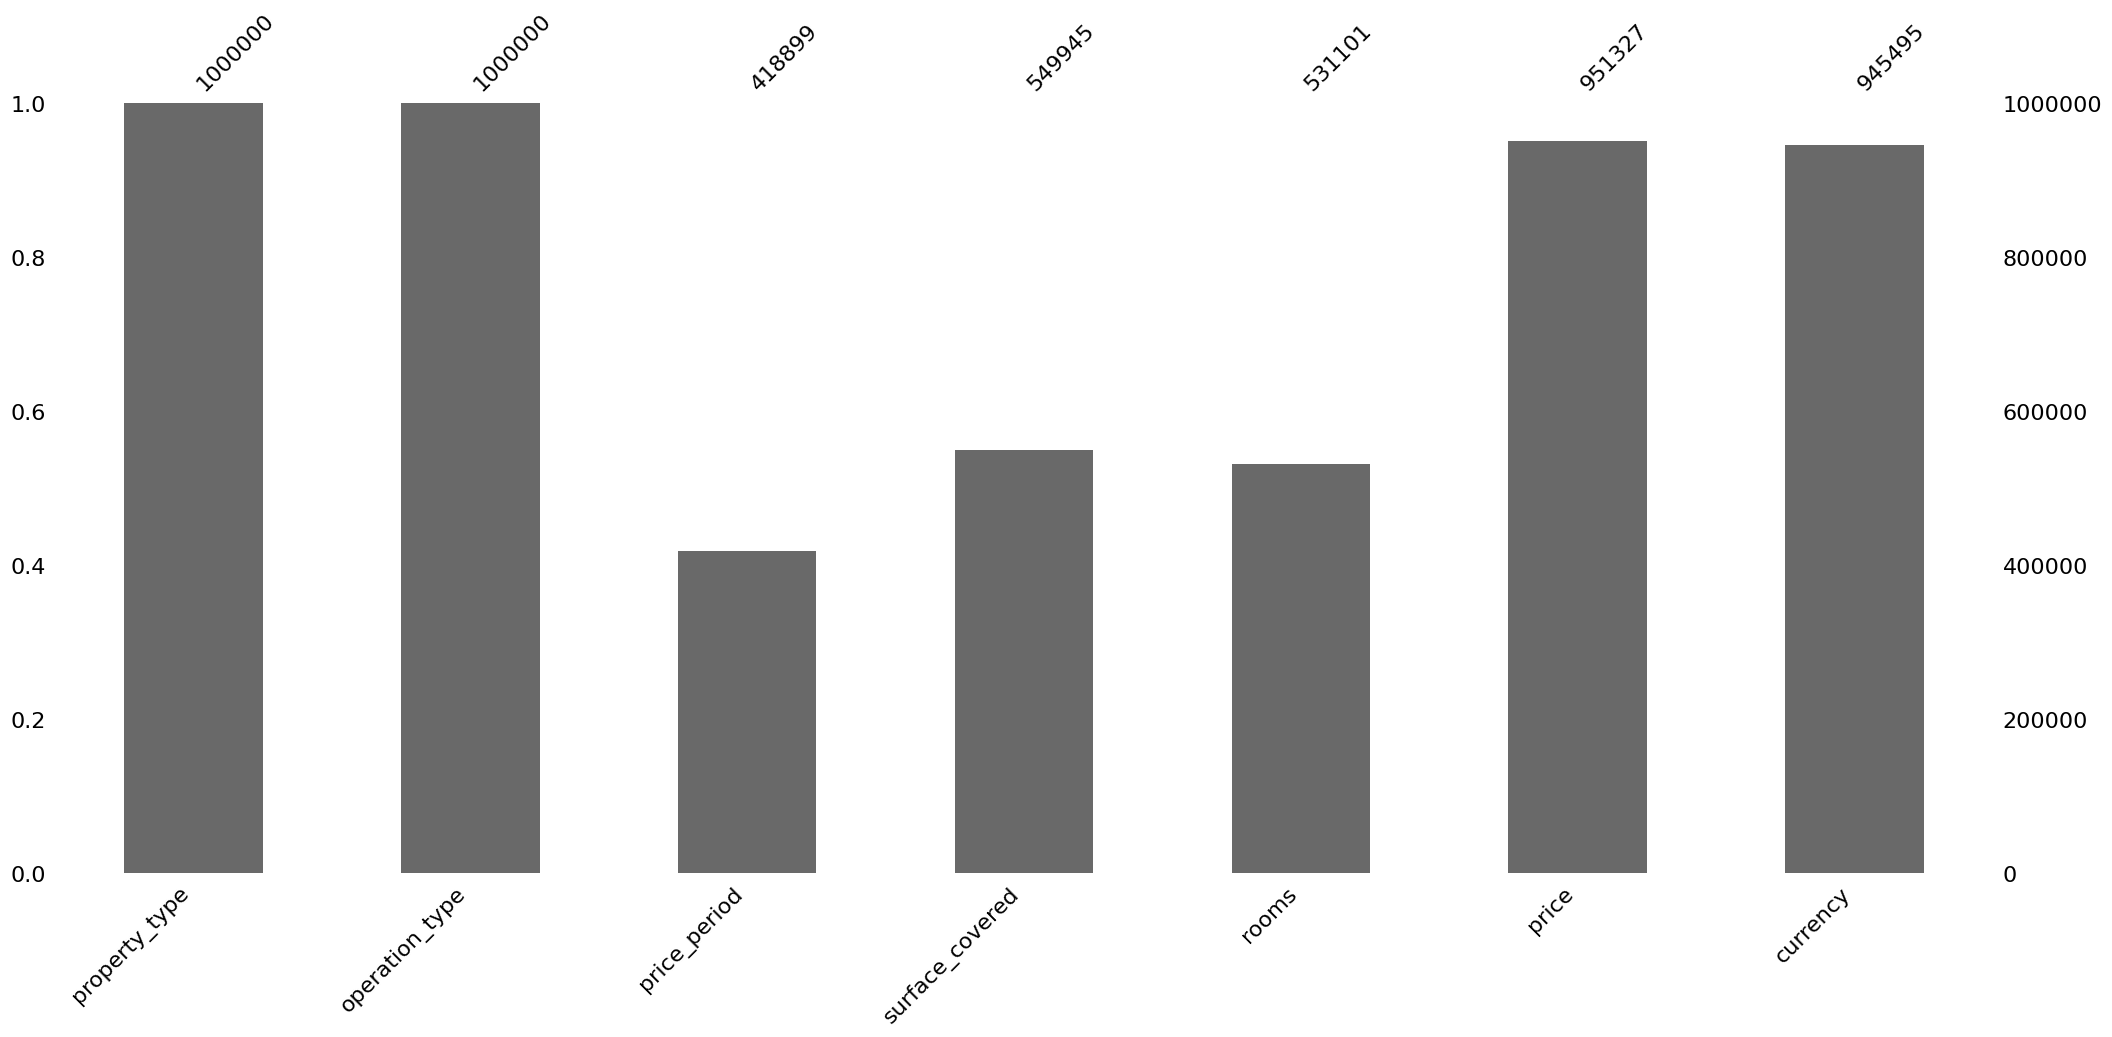

In [26]:
msno.bar(argentina)

In [27]:
#filter by type (then check missing barplot again)

In [28]:
# concatenate chosen country info then train test split (y = country)